<a href="https://colab.research.google.com/github/arpit766/Socialize/blob/main/IPL_Matches_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


In [ ]:
data = pd.read_csv("./IPL Matches 2008-2020.csv")

In [ ]:
data.head()

,id,city,date,player_of_match,venue,neutral_venue,team1,team2,toss_winner,toss_decision,winner,result,result_margin,eliminator,method,umpire1,umpire2
0,335982,Bangalore,2008-04-18,BB McCullum,M Chinnaswamy Stadium,0,Royal Challengers Bangalore,Kolkata Knight Riders,Royal Challengers Bangalore,field,Kolkata Knight Riders,runs,140.0,N,NaN,Asad Rauf,RE Koertzen
1,335983,Chandigarh,2008-04-19,MEK Hussey,"Punjab Cricket Association Stadium, Mohali",0,Kings XI Punjab,Chennai Super Kings,Chennai Super Kings,bat,Chennai Super Kings,runs,33.0,N,NaN,MR Benson,SL Shastri
2,335984,Delhi,2008-04-19,MF Maharoof,Feroz Shah Kotla,0,Delhi Daredevils,Rajasthan Royals,Rajasthan Royals,bat,Delhi Daredevils,wickets,9.0,N,NaN,Aleem Dar,GA Pratapkumar
3,335985,Mumbai,2008-04-20,MV Boucher,Wankhede Stadium,0,Mumbai Indians,Royal Challengers Bangalore,Mumbai Indians,bat,Royal Challengers Bangalore,wickets,5.0,N,NaN,SJ Davis,DJ Harper
4,335986,Kolkata,2008-04-20,DJ Hussey,Eden Gardens,0,Kolkata Knight Riders,Deccan Chargers,Deccan Chargers,bat,Kolkata Knight Riders,wickets,5.0,N,NaN,BF Bowden,K Hariharan


In [ ]:
data.tail()

,id,city,date,player_of_match,venue,neutral_venue,team1,team2,toss_winner,toss_decision,winner,result,result_margin,eliminator,method,umpire1,umpire2
811,1216547,Dubai,2020-09-28,AB de Villiers,Dubai International Cricket Stadium,0,Royal Challengers Bangalore,Mumbai Indians,Mumbai Indians,field,Royal Challengers Bangalore,tie,NaN,Y,NaN,Nitin Menon,PR Reiffel
812,1237177,Dubai,2020-11-05,JJ Bumrah,Dubai International Cricket Stadium,0,Mumbai Indians,Delhi Capitals,Delhi Capitals,field,Mumbai Indians,runs,57.0,N,NaN,CB Gaffaney,Nitin Menon
813,1237178,Abu Dhabi,2020-11-06,KS Williamson,Sheikh Zayed Stadium,0,Royal Challengers Bangalore,Sunrisers Hyderabad,Sunrisers Hyderabad,field,Sunrisers Hyderabad,wickets,6.0,N,NaN,PR Reiffel,S Ravi
814,1237180,Abu Dhabi,2020-11-08,MP Stoinis,Sheikh Zayed Stadium,0,Delhi Capitals,Sunrisers Hyderabad,Delhi Capitals,bat,Delhi Capitals,runs,17.0,N,NaN,PR Reiffel,S Ravi
815,1237181,Dubai,2020-11-10,TA Boult,Dubai International Cricket Stadium,0,Delhi Capitals,Mumbai Indians,Delhi Capitals,bat,Mumbai Indians,wickets,5.0,N,NaN,CB Gaffaney,Nitin Menon


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 816 entries, 0 to 815
Data columns (total 17 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   id               816 non-null    int64  
 1   city             803 non-null    object 
 2   date             816 non-null    object 
 3   player_of_match  812 non-null    object 
 4   venue            816 non-null    object 
 5   neutral_venue    816 non-null    int64  
 6   team1            816 non-null    object 
 7   team2            816 non-null    object 
 8   toss_winner      816 non-null    object 
 9   toss_decision    816 non-null    object 
 10  winner           812 non-null    object 
 11  result           812 non-null    object 
 12  result_margin    799 non-null    float64
 13  eliminator       812 non-null    object 
 14  method           19 non-null     object 
 15  umpire1          816 non-null    object 
 16  umpire2          816 non-null    object 
dtypes: float64(1), i

In [ ]:
data.drop(["method"],axis=1,inplace=True)

**Most wins in IPL**

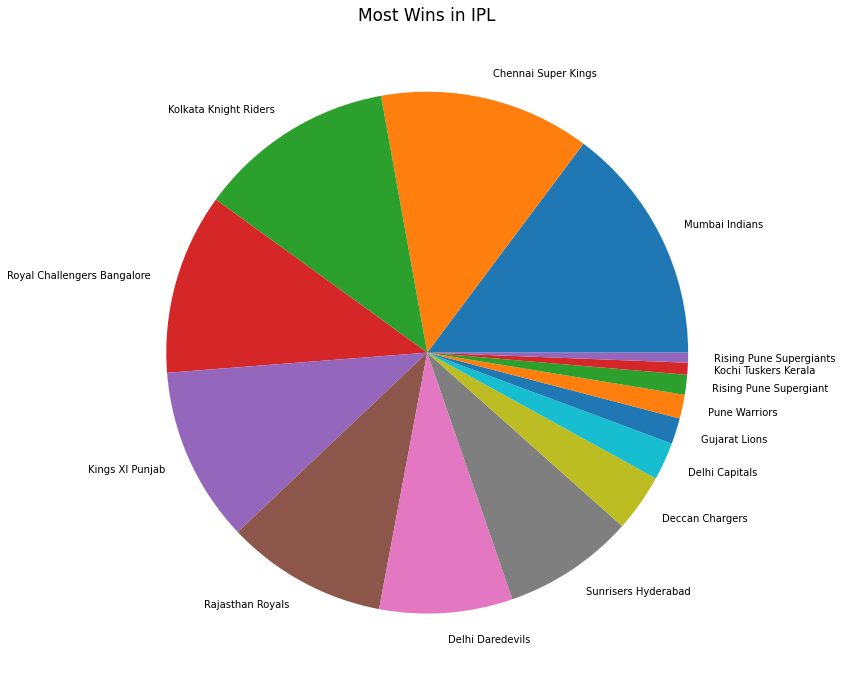

In [ ]:
temp = pd.DataFrame({"Winner":data['winner']})
count_wins=temp.value_counts()
#print(count_wins)

labels =[X[0] for X in count_wins.keys()]

bar , ax = plt.subplots(figsize=(20,12))
ax=plt.pie(x = count_wins,  labels=labels)
plt.title("Most Wins in IPL", fontsize = 17)
plt.show()


**Most wins in Eliminator**


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


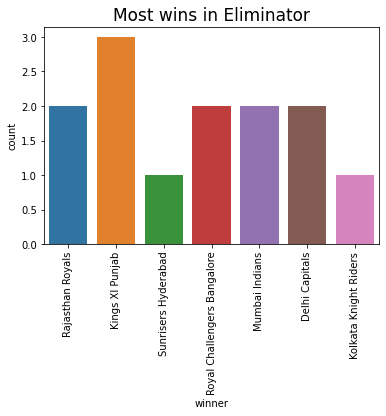

In [ ]:
sns.countplot(data['winner'][data['eliminator']=='Y'],data = data)
plt.title("Most wins in Eliminator", fontsize=17)
plt.xticks(rotation=90)
plt.show()

In [ ]:
teams =data['toss_winner'].unique()
decision_making = pd.DataFrame([],columns=['Toss Winner','Decision','Times'])

for id, element in enumerate(teams):
  temp_bat = data[(data['toss_winner']==element) & (data['toss_decision']=='bat')]
  temp_fields = data[(data['toss_winner']==element) & (data['toss_decision']=='field')]

  decision_making = decision_making.append({'Toss Winner': element,'Decision':'bat','Times': temp_bat['toss_winner'].count()},ignore_index=True)

decision_making = decision_making.append({'Toss Winner': element,'Decision':'fields','Times': temp_bat['toss_winner'].count()},ignore_index=True)



In [ ]:
decision_making

,Toss Winner,Decision,Times
0,Royal Challengers Bangalore,bat,24
1,Chennai Super Kings,bat,51
2,Rajasthan Royals,bat,34
3,Mumbai Indians,bat,48
4,Deccan Chargers,bat,24
5,Kings XI Punjab,bat,27
6,Kolkata Knight Riders,bat,34
7,Delhi Daredevils,bat,29
8,Kochi Tuskers Kerala,bat,3
9,Pune Warriors,bat,11


Text(42.094505570023145, 0.5, ' Toss Decision ')

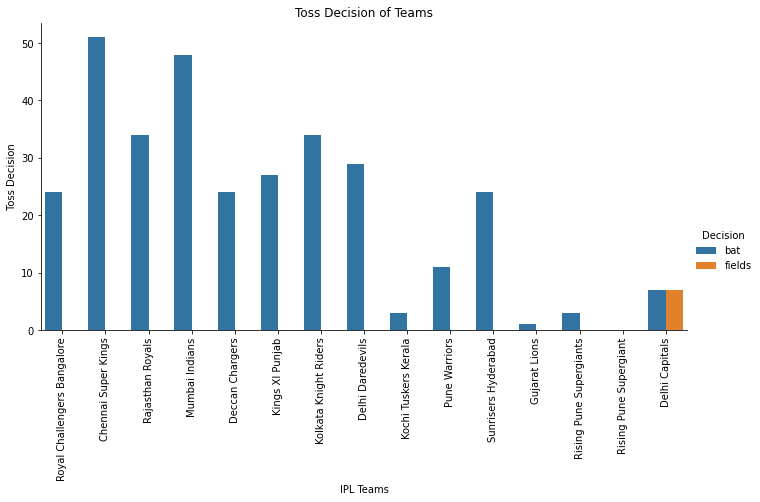

In [ ]:
sns.catplot(x= "Toss Winner", y='Times', hue="Decision", data= decision_making, kind = 'bar', height=5,aspect=2 )

plt.xticks(rotation=90)
plt.title("Toss Decision of Teams")
plt.xlabel("IPL Teams")
plt.ylabel(" Toss Decision ")


**Famous Venue**

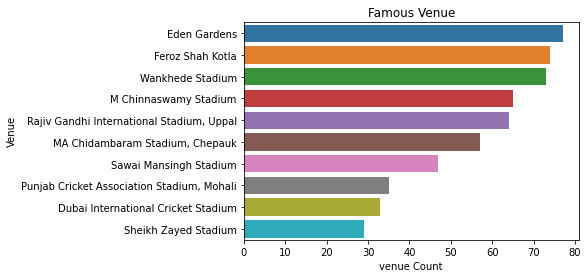

In [ ]:
sns.barplot(x= data['venue'].value_counts().head(10).values,
            y=data['venue'].value_counts().head(10).index,
            data=data
            )

plt.title("Famous Venue")
plt.xlabel("venue Count")
plt.ylabel("Venue")
plt.show()

**Top 5 Umpire_1**

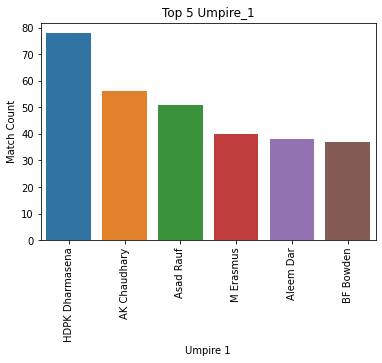

In [ ]:
sns.barplot(x=data['umpire1'].value_counts().head(6).index,
            y=data['umpire1'].value_counts().head(6).values,
            data=data
            )
plt.xticks(rotation = 90)
plt.xlabel("Umpire 1")
plt.ylabel("Match Count")
plt.title('Top 5 Umpire_1')
plt.show()

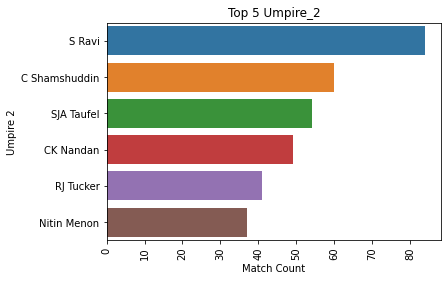

In [ ]:
sns.barplot(x=data['umpire2'].value_counts().head(6).values,
            y=data['umpire2'].value_counts().head(6).index,
            data=data
            )
plt.xticks(rotation = 90)
plt.xlabel("Match Count")
plt.ylabel("Umpire 2")
plt.title('Top 5 Umpire_2')
plt.show()